In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

# Carregue os dados do CSV
dataset = pd.read_csv('dataset.csv')

dataset['Francisco Gross'] = dataset['Francisco Gross'].fillna(dataset['Francisco Gross'].mean())
dataset['São João'] = dataset['São João'].fillna(dataset['São João'].mean())
dataset['Pacotuba'] = dataset['Pacotuba'].fillna(dataset['Pacotuba'].mean())
dataset['Soma'] = dataset['Francisco Gross'] + dataset['São João'] + dataset['Pacotuba']
dataset['data_hora'] = pd.to_datetime(dataset['data_hora'])  # Converta a coluna para o tipo de dataset
dataset['ano'] = dataset['data_hora'].dt.year  # Crie uma coluna para o ano
dataset['mes'] = dataset['data_hora'].dt.month  # Crie uma coluna para o mês
dataset['dia'] = dataset['data_hora'].dt.day  # Crie uma coluna para o dia
dataset['hora'] = dataset['data_hora'].dt.hour  # Crie uma coluna para a hora

# Agora, você pode descartar a coluna original 'data'
dataset.drop('data_hora', axis=1, inplace=True)

# Suponhamos que sua coluna alvo seja 'target' e suas features sejam todas as outras colunas, exceto 'target'
X = dataset.drop(["nível", "estado", "Unnamed: 0"], axis=1)
y = dataset["nível"]


In [48]:
# Divida os dados em conjuntos de treinamento e teste (por exemplo, 80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()

# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)


LinearRegression()

In [50]:
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.053083253517186506
R-squared (R2): 0.7581897438340972


In [51]:
# Coeficientes do modelo
coefficients = model.coef_
intercept = model.intercept_

print('Coeficientes do modelo:')
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

print(f'Intercept: {intercept}')

Coeficientes do modelo:
Francisco Gross: 0.001202886552449295
Pacotuba: 0.0009012069958001206
São João: -0.0017214525898848465
Soma: 0.00038264095836611375
ano: -0.2778889679966716
mes: -0.01858412337397972
dia: -0.010769999244985465
hora: 0.0007148123036838971
Intercept: 562.9662245484787


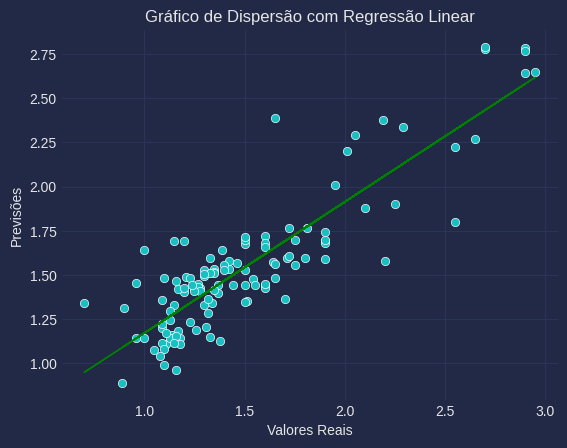

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style("whitegrid")
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Crie um DataFrame para os dados
dados = pd.DataFrame({'Valores Reais': y_test, 'Previsões': y_pred})

# Crie uma instância do modelo de regressão linear (não é necessário treinar novamente)
model = LinearRegression()

# Ajuste o modelo aos dados originais (não é necessário, apenas para fins de visualização)
X = dados['Valores Reais'].values.reshape(-1, 1)
y = dados['Previsões'].values.reshape(-1, 1)
model.fit(X, y)

# Crie o scatter plot com a linha de regressão usando seaborn e matplotlib
sns.scatterplot(x='Valores Reais', y='Previsões', data=dados)
plt.plot(X, model.predict(X), color='green', linewidth=1)  # Linha de regressão em vermelho

# Defina um título para o gráfico
plt.title('Gráfico de Dispersão com Regressão Linear')

# Mostre o gráfico
plt.show()
